# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [7]:
import os
import keras
import itertools

# 設定 GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [8]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [9]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [10]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [13]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000

50000/50000 [==============================] - 10s 204us/step - loss: 0.7922 - accuracy: 0.7171 - val_loss: 1.5966 - val_accuracy: 0.4932
Epoch 49/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.7698 - accuracy: 0.7287 - val_loss: 1.6809 - val_accuracy: 0.4851
Epoch 50/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.7579 - accuracy: 0.7310 - val_loss: 1.5601 - val_accuracy: 0.5262
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____

50000/50000 [==============================] - 12s 235us/step - loss: 2.3078 - accuracy: 0.1007 - val_loss: 2.3156 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 13s 252us/step - loss: 2.3080 - accuracy: 0.1008 - val_loss: 2.3150 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.3079 - accuracy: 0.0978 - val_loss: 2.3234 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.3084 - accuracy: 0.0981 - val_loss: 2.3089 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 13s 263us/step - loss: 2.3074 - accuracy: 0.0997 - val_loss: 2.3205 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 13s 251us/step - loss: 2.3080 - accuracy: 0.1006 - val_loss: 2.3094 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
Model: "model_1"
_________________

50000/50000 [==============================] - 13s 265us/step - loss: 1.4295 - accuracy: 0.4898 - val_loss: 1.5630 - val_accuracy: 0.4511
Epoch 43/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.4307 - accuracy: 0.4884 - val_loss: 1.8453 - val_accuracy: 0.3675
Epoch 44/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.4234 - accuracy: 0.4897 - val_loss: 1.7348 - val_accuracy: 0.3971
Epoch 45/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.4120 - accuracy: 0.4929 - val_loss: 1.5345 - val_accuracy: 0.4538
Epoch 46/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.4068 - accuracy: 0.4981 - val_loss: 1.5420 - val_accuracy: 0.4551
Epoch 47/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.4034 - accuracy: 0.4998 - val_loss: 1.6109 - val_accuracy: 0.4307
Epoch 48/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.3926 - accuracy: 0.5020 - va

50000/50000 [==============================] - 14s 283us/step - loss: 2.3064 - accuracy: 0.1012 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 14s 284us/step - loss: 2.3069 - accuracy: 0.0987 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 14s 281us/step - loss: 2.3065 - accuracy: 0.1011 - val_loss: 2.3111 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 14s 273us/step - loss: 2.3072 - accuracy: 0.1003 - val_loss: 2.3086 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 14s 275us/step - loss: 2.3067 - accuracy: 0.0990 - val_loss: 2.3051 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 15s 304us/step - loss: 2.3081 - accuracy: 0.1001 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.3067 - accuracy: 0.1026 - va

50000/50000 [==============================] - 11s 224us/step - loss: 1.3329 - accuracy: 0.5316 - val_loss: 1.4248 - val_accuracy: 0.4911
Epoch 37/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.3194 - accuracy: 0.5379 - val_loss: 1.4125 - val_accuracy: 0.4957
Epoch 38/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.3189 - accuracy: 0.5362 - val_loss: 1.6154 - val_accuracy: 0.4353
Epoch 39/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.3087 - accuracy: 0.5407 - val_loss: 1.6310 - val_accuracy: 0.4475
Epoch 40/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.3068 - accuracy: 0.5423 - val_loss: 1.5395 - val_accuracy: 0.4576
Epoch 41/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.2946 - accuracy: 0.5461 - val_loss: 1.4851 - val_accuracy: 0.4728
Epoch 42/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.2890 - accuracy: 0.5509 - va

50000/50000 [==============================] - 12s 230us/step - loss: 1.7399 - accuracy: 0.3727 - val_loss: 1.8432 - val_accuracy: 0.3434
Epoch 34/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7346 - accuracy: 0.3751 - val_loss: 1.7392 - val_accuracy: 0.3690
Epoch 35/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.7281 - accuracy: 0.3771 - val_loss: 1.7741 - val_accuracy: 0.3516
Epoch 36/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.7278 - accuracy: 0.3767 - val_loss: 2.0965 - val_accuracy: 0.2827
Epoch 37/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.7316 - accuracy: 0.3765 - val_loss: 1.7608 - val_accuracy: 0.3640
Epoch 38/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.7287 - accuracy: 0.3762 - val_loss: 1.8003 - val_accuracy: 0.3597
Epoch 39/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.7281 - accuracy: 0.3780 - va

50000/50000 [==============================] - 11s 218us/step - loss: 1.2159 - accuracy: 0.5704 - val_loss: 1.3744 - val_accuracy: 0.5128
Epoch 31/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.2050 - accuracy: 0.5745 - val_loss: 1.3859 - val_accuracy: 0.5118
Epoch 32/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.1973 - accuracy: 0.5786 - val_loss: 1.3868 - val_accuracy: 0.5107
Epoch 33/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.1880 - accuracy: 0.5791 - val_loss: 1.4430 - val_accuracy: 0.4992
Epoch 34/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.1790 - accuracy: 0.5835 - val_loss: 1.4211 - val_accuracy: 0.5045
Epoch 35/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.1701 - accuracy: 0.5859 - val_loss: 1.4204 - val_accuracy: 0.5001
Epoch 36/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.1615 - accuracy: 0.5905 - va

50000/50000 [==============================] - 13s 265us/step - loss: 1.5008 - accuracy: 0.4596 - val_loss: 1.5509 - val_accuracy: 0.4389
Epoch 28/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.4875 - accuracy: 0.4653 - val_loss: 1.6154 - val_accuracy: 0.4176
Epoch 29/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.4963 - accuracy: 0.4639 - val_loss: 1.6086 - val_accuracy: 0.4230
Epoch 30/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.4970 - accuracy: 0.4609 - val_loss: 1.5585 - val_accuracy: 0.4447
Epoch 31/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.4774 - accuracy: 0.4700 - val_loss: 1.5814 - val_accuracy: 0.4448
Epoch 32/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.4748 - accuracy: 0.4711 - val_loss: 1.5746 - val_accuracy: 0.4420
Epoch 33/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.4761 - accuracy: 0.4688 - va

50000/50000 [==============================] - 11s 214us/step - loss: 1.7771 - accuracy: 0.3817 - val_loss: 1.7757 - val_accuracy: 0.3847
Epoch 25/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.7707 - accuracy: 0.3833 - val_loss: 1.7698 - val_accuracy: 0.3849
Epoch 26/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.7648 - accuracy: 0.3853 - val_loss: 1.7634 - val_accuracy: 0.3882
Epoch 27/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.7589 - accuracy: 0.3876 - val_loss: 1.7595 - val_accuracy: 0.3850
Epoch 28/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.7535 - accuracy: 0.3896 - val_loss: 1.7527 - val_accuracy: 0.3886
Epoch 29/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.7480 - accuracy: 0.3898 - val_loss: 1.7473 - val_accuracy: 0.3926
Epoch 30/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.7428 - accuracy: 0.3926 - va

50000/50000 [==============================] - 13s 270us/step - loss: 1.2153 - accuracy: 0.5668 - val_loss: 1.5569 - val_accuracy: 0.4739
Epoch 22/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.1980 - accuracy: 0.5708 - val_loss: 1.5092 - val_accuracy: 0.4731
Epoch 23/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.1804 - accuracy: 0.5775 - val_loss: 1.4668 - val_accuracy: 0.4953
Epoch 24/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.1624 - accuracy: 0.5850 - val_loss: 1.4257 - val_accuracy: 0.5121
Epoch 25/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.1437 - accuracy: 0.5892 - val_loss: 1.5413 - val_accuracy: 0.4783
Epoch 26/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.1231 - accuracy: 0.5992 - val_loss: 1.5810 - val_accuracy: 0.4918
Epoch 27/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.1055 - accuracy: 0.6045 - va

50000/50000 [==============================] - 11s 216us/step - loss: 1.4354 - accuracy: 0.5012 - val_loss: 1.5025 - val_accuracy: 0.4687
Epoch 19/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.4257 - accuracy: 0.5060 - val_loss: 1.4681 - val_accuracy: 0.4829
Epoch 20/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.4175 - accuracy: 0.5073 - val_loss: 1.4665 - val_accuracy: 0.4790
Epoch 21/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.4095 - accuracy: 0.5117 - val_loss: 1.4522 - val_accuracy: 0.4886
Epoch 22/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4027 - accuracy: 0.5135 - val_loss: 1.4567 - val_accuracy: 0.4810
Epoch 23/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.3951 - accuracy: 0.5165 - val_loss: 1.4685 - val_accuracy: 0.4773
Epoch 24/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3882 - accuracy: 0.5175 - va

50000/50000 [==============================] - 13s 256us/step - loss: 1.2259 - accuracy: 0.5626 - val_loss: 1.3849 - val_accuracy: 0.5122
Epoch 16/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.2095 - accuracy: 0.5695 - val_loss: 1.4003 - val_accuracy: 0.5070
Epoch 17/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.1882 - accuracy: 0.5745 - val_loss: 1.3856 - val_accuracy: 0.5198
Epoch 18/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.1630 - accuracy: 0.5861 - val_loss: 1.4204 - val_accuracy: 0.5094
Epoch 19/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.1466 - accuracy: 0.5910 - val_loss: 1.4146 - val_accuracy: 0.5047
Epoch 20/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.1294 - accuracy: 0.5987 - val_loss: 1.3725 - val_accuracy: 0.5269
Epoch 21/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.1141 - accuracy: 0.6026 - va

50000/50000 [==============================] - 10s 194us/step - loss: 2.1971 - accuracy: 0.2159 - val_loss: 2.1933 - val_accuracy: 0.2215
Epoch 13/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.1905 - accuracy: 0.2209 - val_loss: 2.1867 - val_accuracy: 0.2246
Epoch 14/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.1840 - accuracy: 0.2240 - val_loss: 2.1804 - val_accuracy: 0.2284
Epoch 15/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.1778 - accuracy: 0.2286 - val_loss: 2.1743 - val_accuracy: 0.2331
Epoch 16/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.1717 - accuracy: 0.2318 - val_loss: 2.1683 - val_accuracy: 0.2352
Epoch 17/50
50000/50000 [==============================] - 9s 182us/step - loss: 2.1658 - accuracy: 0.2345 - val_loss: 2.1626 - val_accuracy: 0.2372
Epoch 18/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.1601 - accuracy: 0.2377 - val_

50000/50000 [==============================] - 12s 242us/step - loss: 1.4839 - accuracy: 0.4748 - val_loss: 1.7361 - val_accuracy: 0.4028
Epoch 10/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.4613 - accuracy: 0.4833 - val_loss: 1.4911 - val_accuracy: 0.4645
Epoch 11/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.4429 - accuracy: 0.4902 - val_loss: 1.5921 - val_accuracy: 0.4208
Epoch 12/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.4177 - accuracy: 0.4983 - val_loss: 1.4915 - val_accuracy: 0.4542
Epoch 13/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.4044 - accuracy: 0.5063 - val_loss: 1.4766 - val_accuracy: 0.4805
Epoch 14/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3825 - accuracy: 0.5122 - val_loss: 1.5555 - val_accuracy: 0.4538
Epoch 15/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.3665 - accuracy: 0.5196 - va

50000/50000 [==============================] - 10s 208us/step - loss: 1.8328 - accuracy: 0.3682 - val_loss: 1.8297 - val_accuracy: 0.3666
Epoch 7/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.8190 - accuracy: 0.3717 - val_loss: 1.8191 - val_accuracy: 0.3716
Epoch 8/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.8071 - accuracy: 0.3764 - val_loss: 1.8078 - val_accuracy: 0.3733
Epoch 9/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.7968 - accuracy: 0.3805 - val_loss: 1.7982 - val_accuracy: 0.3774
Epoch 10/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.7873 - accuracy: 0.3838 - val_loss: 1.7896 - val_accuracy: 0.3788
Epoch 11/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7791 - accuracy: 0.3870 - val_loss: 1.7820 - val_accuracy: 0.3837
Epoch 12/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.7713 - accuracy: 0.3882 - val_l

50000/50000 [==============================] - 13s 263us/step - loss: 1.6380 - accuracy: 0.4247 - val_loss: 1.5979 - val_accuracy: 0.4421
Epoch 4/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.5818 - accuracy: 0.4414 - val_loss: 1.6039 - val_accuracy: 0.4274
Epoch 5/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.5370 - accuracy: 0.4575 - val_loss: 1.5392 - val_accuracy: 0.4591
Epoch 6/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.5004 - accuracy: 0.4723 - val_loss: 1.5071 - val_accuracy: 0.4624
Epoch 7/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.4665 - accuracy: 0.4840 - val_loss: 1.5054 - val_accuracy: 0.4718
Epoch 8/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.4372 - accuracy: 0.4972 - val_loss: 1.4620 - val_accuracy: 0.4741
Epoch 9/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.4107 - accuracy: 0.5066 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.3650 - accuracy: 0.0992 - val_loss: 2.3621 - val_accuracy: 0.1003
Epoch 2/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.3544 - accuracy: 0.1004 - val_loss: 2.3520 - val_accuracy: 0.1015
Epoch 3/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.3454 - accuracy: 0.1024 - val_loss: 2.3435 - val_accuracy: 0.1039
Epoch 4/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.3378 - accuracy: 0.1042 - val_loss: 2.3362 - val_accuracy: 0.1062
Epoch 5/50
50000/50000 [==============================] - 9s 190us/step - loss: 2.3313 - accuracy: 0.1048 - val_loss: 2.3300 - val_accuracy: 0.1092
Epoch 6/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.3257 - accuracy: 0.1069 - val_loss: 2.3247 - val_accuracy: 0.1107
Epoch 7/50
50000/50000 [==============================] - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.1319 - accuracy: 0.2412 - val_loss: 2.0216 - val_accuracy: 0.2898
Epoch 2/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.9653 - accuracy: 0.3122 - val_loss: 1.9217 - val_accuracy: 0.3252
Epoch 3/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.8909 - accuracy: 0.3403 - val_loss: 1.8669 - val_accuracy: 0.3499
Epoch 4/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.8439 - accuracy: 0.3576 - val_loss: 1.8283 - val_accuracy: 0.3615
Epoch 5/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.8093 - accuracy: 0.3698 - val_loss: 1.8108 - val_accuracy: 0.3641
Epoch 6/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.7814 - accuracy: 0.3798 - val_loss: 1.7717 - val_accuracy: 0.3887
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 229us/step - loss: 2.2816 - accuracy: 0.1516 - val_loss: 2.2438 - val_accuracy: 0.1780
Epoch 2/50
50000/50000 [==============================] - 12s 232us/step - loss: 2.2255 - accuracy: 0.1958 - val_loss: 2.2105 - val_accuracy: 0.2115
Epoch 3/50
50000/50000 [==============================] - 12s 230us/step - loss: 2.1978 - accuracy: 0.2187 - val_loss: 2.1877 - val_accuracy: 0.2262
Epoch 4/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.1784 - accuracy: 0.2304 - val_loss: 2.1711 - val_accuracy: 0.2400
Epoch 5/50
50000/50000 [==============================] - 12s 237us/step - loss: 2.1636 - accuracy: 0.2415 - val_loss: 2.1581 - val_accuracy: 0.2462
Epoch 6/50
50000/50000 [==============================] - 13s 268us/step - loss: 2.1517 - accuracy: 0.2464 - val_loss: 2.1471 - val_accuracy: 0.2485
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 293us/step - loss: 2.1259 - accuracy: 0.2401 - val_loss: 2.0006 - val_accuracy: 0.3028
Epoch 2/50
50000/50000 [==============================] - 15s 296us/step - loss: 1.9415 - accuracy: 0.3258 - val_loss: 1.8904 - val_accuracy: 0.3438
Epoch 3/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.8579 - accuracy: 0.3533 - val_loss: 1.8280 - val_accuracy: 0.3640
Epoch 4/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.8047 - accuracy: 0.3723 - val_loss: 1.7847 - val_accuracy: 0.3753
Epoch 5/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.7669 - accuracy: 0.3848 - val_loss: 1.7515 - val_accuracy: 0.3914
Epoch 6/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.7370 - accuracy: 0.3970 - val_loss: 1.7250 - val_accuracy: 0.3980
Epoch 7/50
50000/50000 [==============================] 

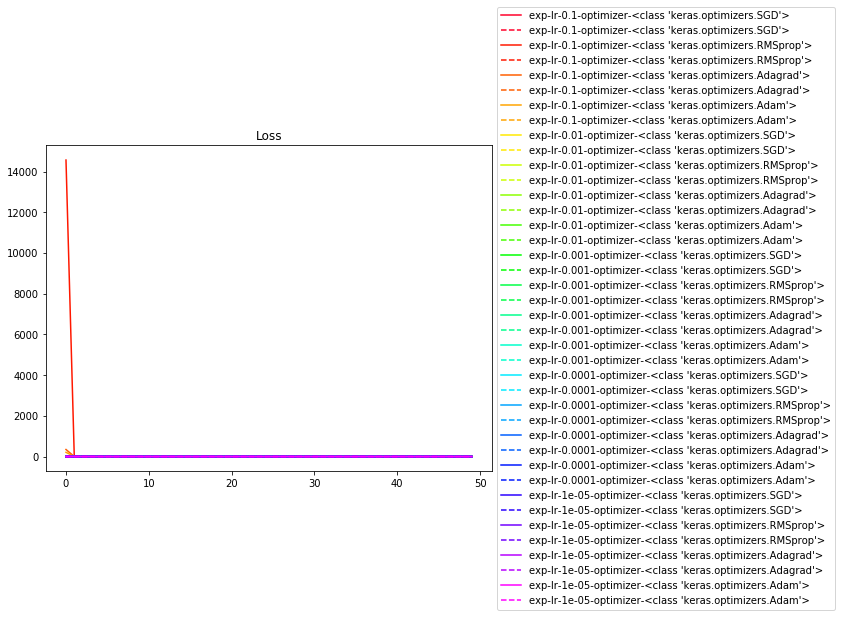

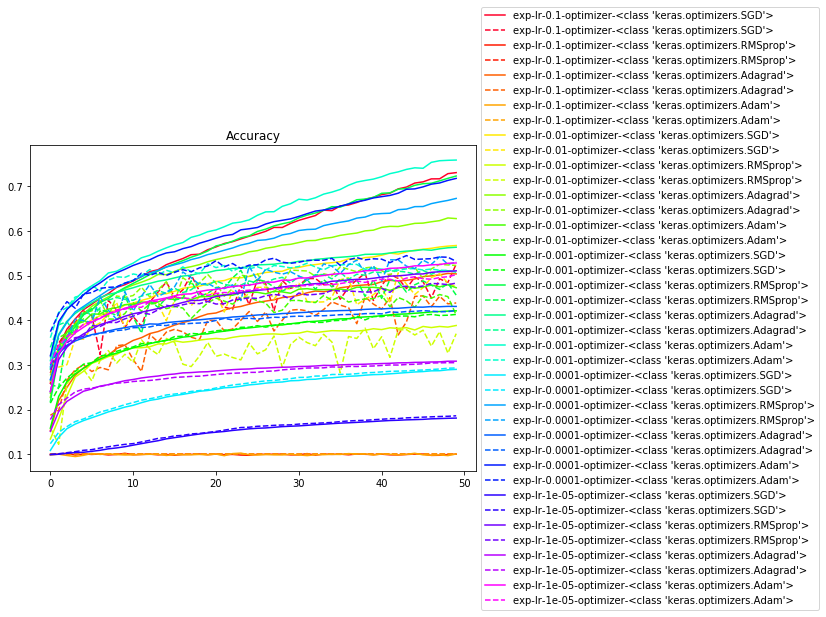

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()